<a href="https://colab.research.google.com/github/theclosedbook/TensorFlow/blob/main/02_Neural_Netwrok_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

A classification is where you try to classify something as one thing or another

A few types of classificationproblems:
* Binary classificaton
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles (n_samples , noise = 0.03 , random_state = 42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"lablel":y})
circles

,X0,X1,lablel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


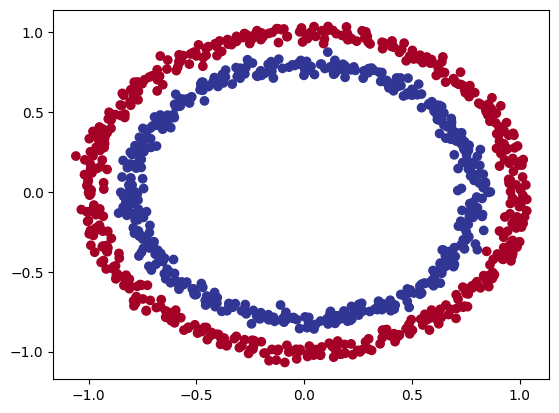

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Input and Output shapes

In [6]:
# Check the shapes of our features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Complie the model
3. Fit the model
4. Evaluate the model

In [9]:
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed(42)

# Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# compile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics =['accuracy'])
# fit the model
model_1.fit(X,y,epochs = 5)

Epoch 1/5
32/32 [==============================] - 2s 5ms/step - loss: 5.6051 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.0386 - accuracy: 0.4910
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 2.9456 - accuracy: 0.4790
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7253 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7041 - accuracy: 0.4990


In [11]:
# Training for longer
model_1.fit(X,y,epochs = 200 , verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [12]:
# Adding an extra layer
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compilinf the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
# Fit the model
model_2.fit(X,y,epochs = 100, verbose=0)

In [13]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932592988014221, 0.5]

### Improving the model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might to choose a different optimization function such as Adam instead of SGD
3. Fiting the model - perhaps we might fit our model for more epochs


In [14]:
# set the random seed
tf.random.set_seed(42)
# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
# Fit the model
model_3.fit(X,y,epochs = 100 ,verbose=0)

In [15]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5020


[0.6979141235351562, 0.5019999742507935]

To visualize our model's predictions, lets create a function `plot_decision_boundary()` , this function will:

* Take in a trained model , features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np


In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


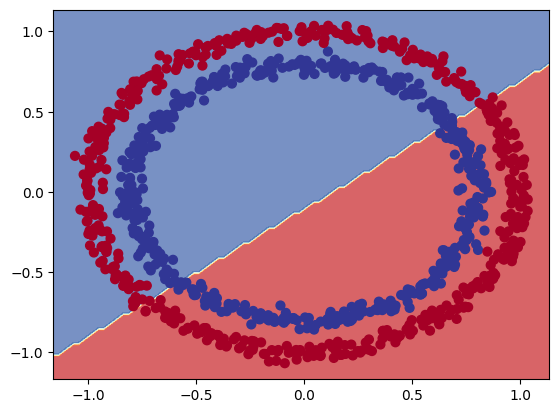

In [18]:
# Check out the predictions oof our model
plot_decision_boundary(model = model_3,X=X,y=y)

In [20]:
# Lets see if our model can be used for a regression model
# set random seed
tf.random.set_seed(42)
# create some regression data
X_regression = tf.range(0,1000,5)
y_regression =tf.range(100,1100,5)
#splitting data in trainnig and testing data set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [21]:
# Recreating the model for running regression model
# create the model
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compiling the model
model_reg.compile(loss = tf.keras.losses.mae,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['mae'])
# Fit the model
model_reg.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 5ms/step - loss: 354.9872 - mae: 354.9872
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 244.1912 - mae: 244.1912
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 135.3675 - mae: 135.3675
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 48.8211 - mae: 48.8211
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 79.1263 - mae: 79.1263
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 75.4058 - mae: 75.4058
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 46.5590 - mae: 46.5590
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 53.2644 - mae: 53.2644
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 46.6357 - mae: 46.6357
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 46.0164 - mae: 46.0164
Epoch 11/200
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


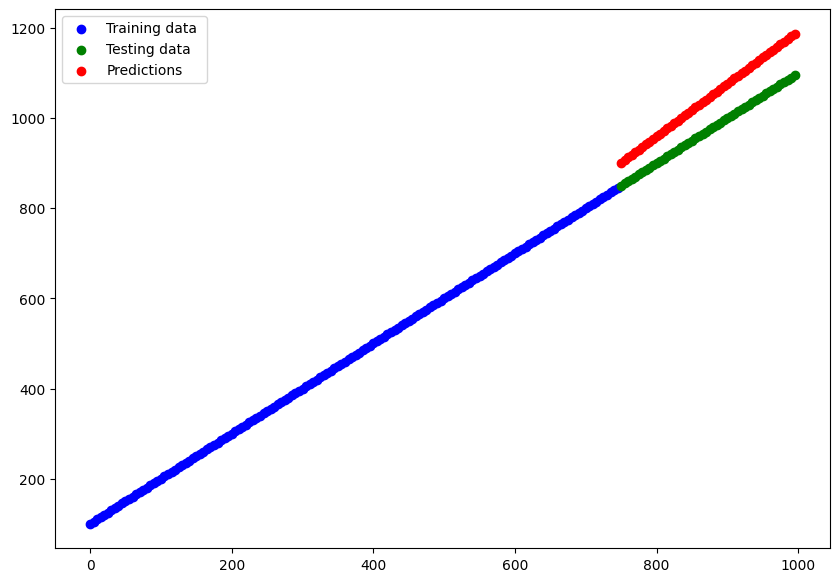

In [22]:
# Make prediction with our trained model
y_reg_preds = model_reg.predict(X_reg_test)

#Plot the models predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label = "Training data ")
plt.scatter(X_reg_test,y_reg_test,c='g',label = "Testing data")
plt.scatter(X_reg_test,y_reg_preds,c='r',label = "Predictions")
plt.legend()

### The missing piece is Non-Linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.linear)
])
# Compiling the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr =0.001),
                metrics = ['accuracy'])
# Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3247 - accuracy: 0.4260
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2475 - accuracy: 0.4200
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2098 - accuracy: 0.4150
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1989 - accuracy: 0.4130
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1074 - accuracy: 0.4170
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0115 - accuracy: 0.4330
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9468 - accuracy: 0.4390
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9303 - accuracy: 0.4530
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8707 - accuracy: 0.4560
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7689 - accuracy: 0.4550
Epoch 11/

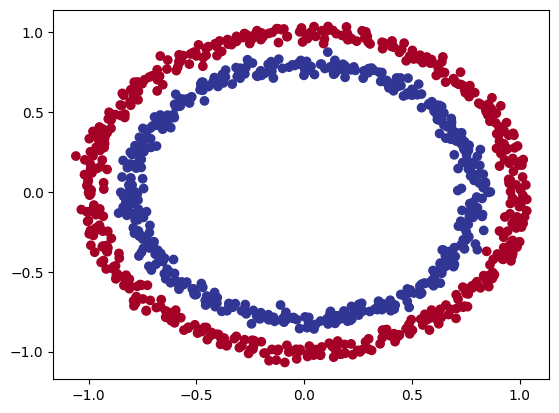

In [24]:
# Check our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


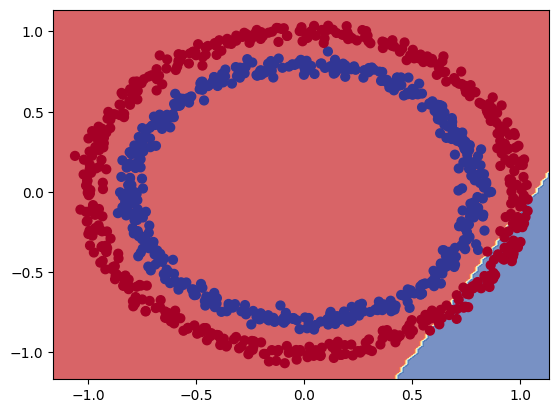

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

Building our models with non-linear activation functions.

In [26]:
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9327 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9256 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9199 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8662 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8438 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8325 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8271 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8379 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8267 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8131 - accuracy: 0.4890
Epoch 11/

In [27]:
# Set the random seed
tf.random.set_seed(42)
# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics =['accuracy'])
# Fit the model
history = model_6.fit(X,y,epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.9130 - accuracy: 0.4920
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8114 - accuracy: 0.4140
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7803 - accuracy: 0.3450
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7694 - accuracy: 0.3080
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7632 - accuracy: 0.2730
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7594 - accuracy: 0.2630
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.2080
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7532 - accuracy: 0.1970
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7501 - accuracy: 0.2140
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.2360
Epoch 11/

In [28]:
# Evaluating the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9770


[0.060878776013851166, 0.9769999980926514]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


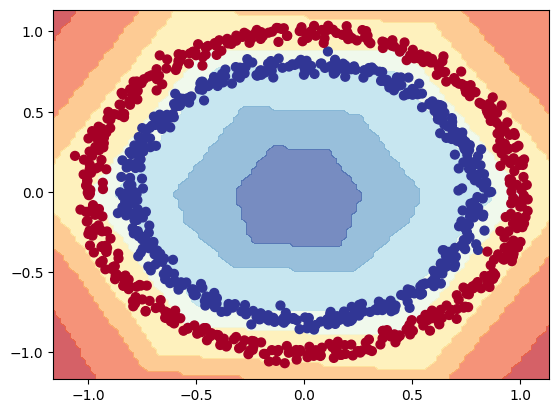

In [29]:
# Ploting the model predictions
plot_decision_boundary(model_6,X,y)

In [30]:
# Adding activation for output layer
# Set the random seed
tf.random.set_seed(42)
# Creating the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# Compiling the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
# Fit the model
model_7.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7036 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4240
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4310
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4410
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4770
Epoch 11/

In [31]:
# Evaluating the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.9550


[0.33391284942626953, 0.9549999833106995]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


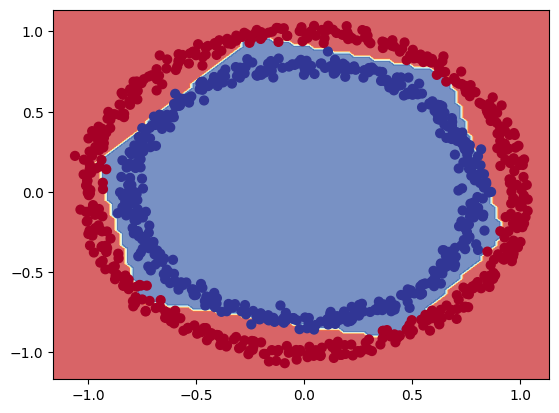

In [32]:
# Visualizing the model prediction
plot_decision_boundary(model = model_7, X=X,y=y)

In [33]:
# Create a toy tensor (simialr to the data we pass into our models )
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

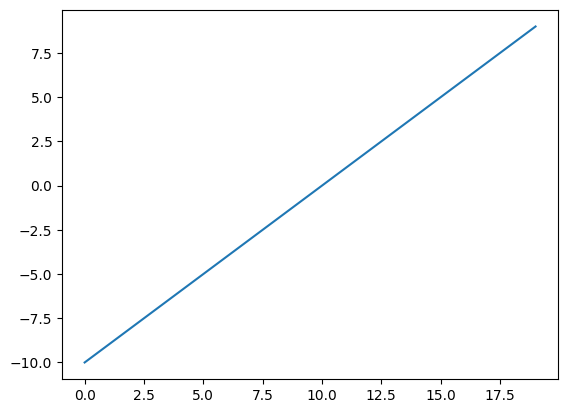

In [34]:
plt.plot(A)

In [35]:
# Lets start by replicating sigmoid - sigmoid(x) = 1 /(1+exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Using sigmoid on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

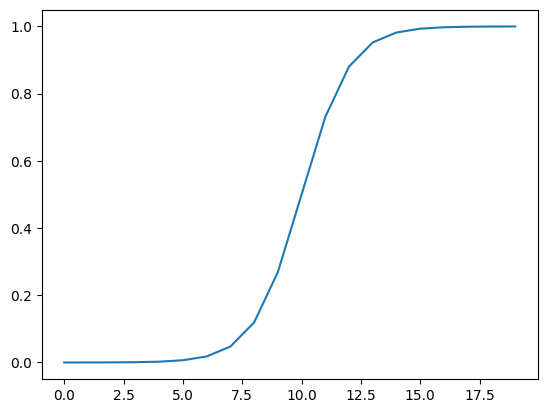

In [36]:
plt.plot(sigmoid(A))

In [37]:
# Lets recreate Relu Function
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

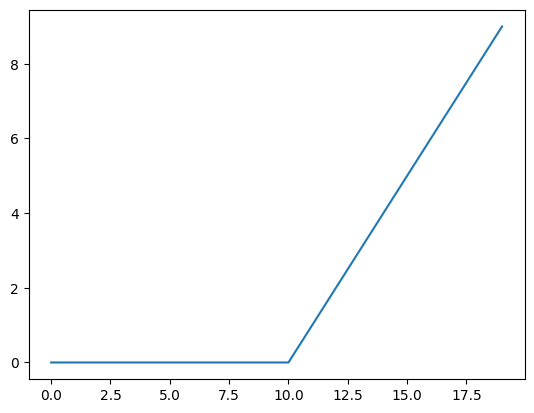

In [38]:
plt.plot(relu(A))

In [39]:
# Lets try the Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

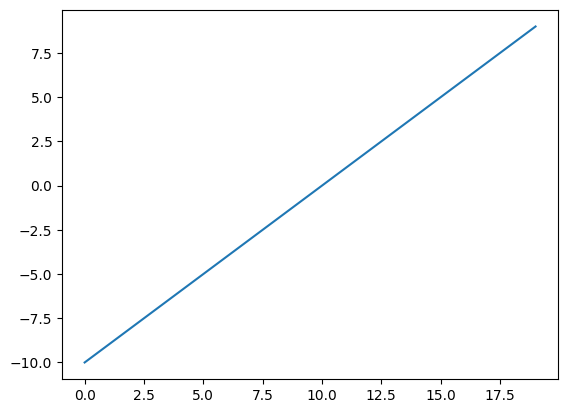

In [40]:
plt.plot(tf.keras.activations.linear(A))

In [41]:
# Creating training and testing dataset
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

In [42]:
# Set Random Seed
tf.random.set_seed(42)
# Creating the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# Compiling the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
# Fit the model
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6879 - accuracy: 0.5625
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5550
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5437
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5838
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.5725
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6212
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6137
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6400
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6350
Epoch 11/25
25/25 [

In [43]:
# Evaluating the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.8800


[0.2107120007276535, 0.8799999952316284]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


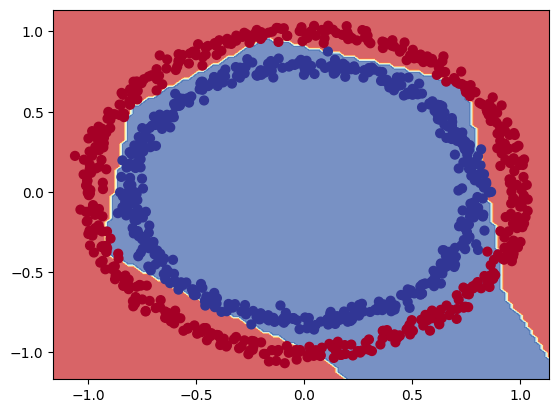

In [44]:
# Ploting the predictions
plot_decision_boundary(model = model_8,X=X,y=y)

Plot the loss (or training) curves

In [45]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.687930,0.56250
1,0.683234,0.55500
2,0.676507,0.54375
3,0.670053,0.58375
4,0.662183,0.58500
5,0.653526,0.57250
6,0.643971,0.62125
7,0.638153,0.61375
8,0.624833,0.64000
9,0.617954,0.63500


Text(0.5, 1.0, 'Model_8 Loss Curve')

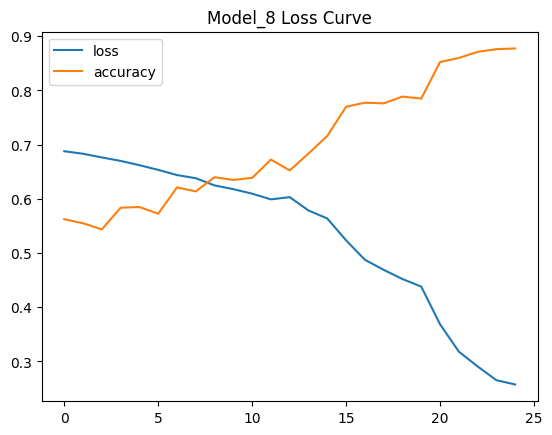

In [46]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curve")

## Finding the best learning rate

To find the ideal learning rate (the learning rate twhere the loss decreases the most during training) we're going to use the following steps:
* A learning rate **Callback** - you can think of a callback as an extra piece of functionallity, you can add to your *while* its training.
* Another model
* A modeified loss curve plot

In [47]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# Compiling the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
"""
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
                """
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7374 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7346 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7331 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7315 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7281 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [48]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4950


[0.6933556199073792, 0.4950000047683716]

<Axes: >

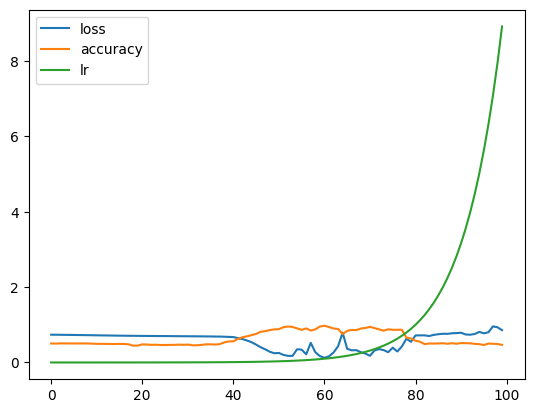

In [49]:
# Plot the loss curves
pd.DataFrame(history_9.history).plot()

Text(0.5, 1.0, 'Learning Rate vs Loss')

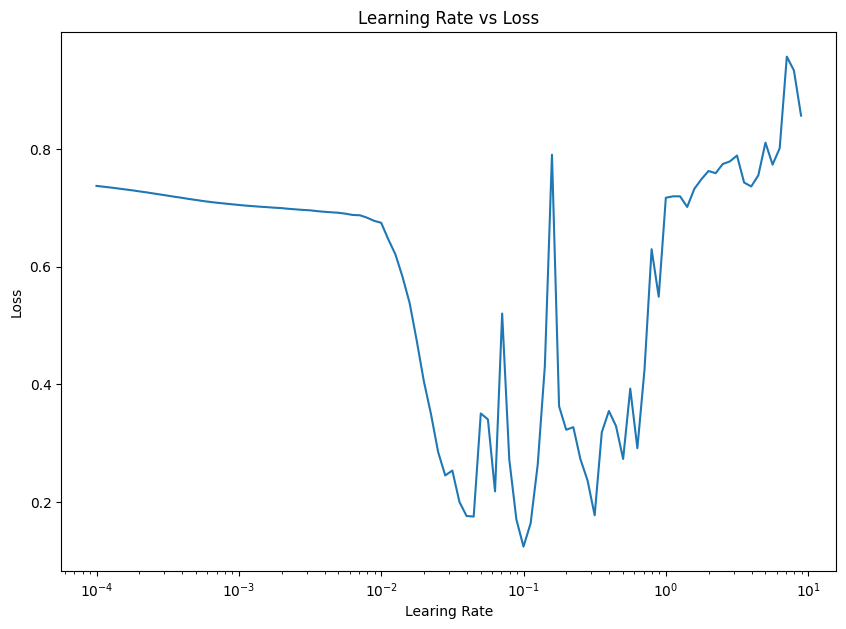

In [50]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learing Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [51]:
# Examples of other typical learning rates values:
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [52]:
# Set the random seed
tf.random.set_seed(42)
# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# Compiling the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])
# Fit the model
history_10 = model_10.fit(X_train,y_train,epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.4538
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4850
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5075
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5275
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5663
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5362
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6988
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.6963
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7287
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7875
Epoch 11/

In [53]:
# Evaluating the model
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9950


[0.010712772607803345, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


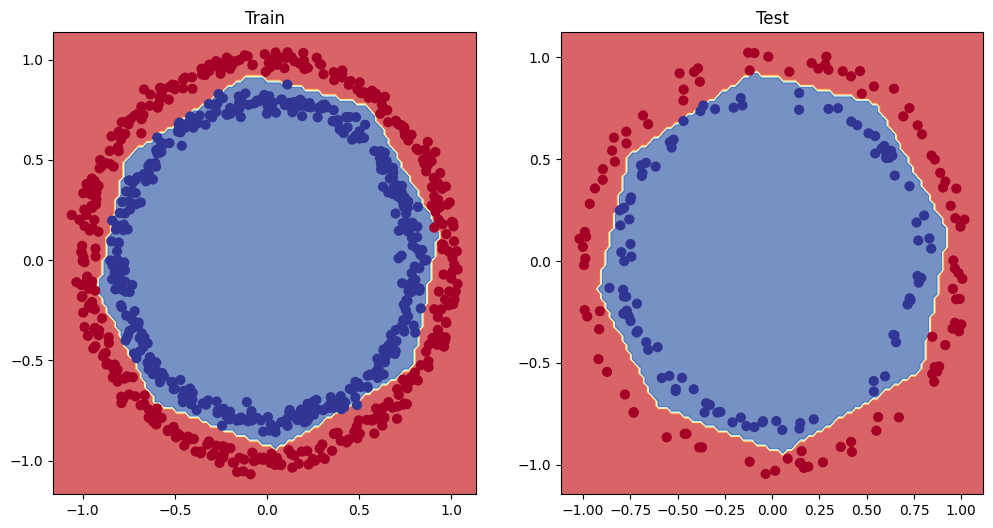

In [54]:
# Plot the decision boundaries for training and testing sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

 ### More classification evaluation methods

 Alongside visualizing our modls resulta as much as possible,
 there are a handful of other classification evaluation methods & metrics you should be familiar with:
 * Accuracy
 * Precision
 * Recall
 * F1-score
 * Confusion matrix
 * Classification report(Scikit-learn)

In [56]:
# Check the accuracy of our model
loss , accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9950
Model loss on the test set : 0.010712772607803345
Model accuracy on the test set: 99.50


Confusion Matrix

In [57]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test,y_preds)


7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [59]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [60]:
y_preds[:10]

array([[9.9814755e-01],
       [9.9814755e-01],
       [9.9814755e-01],
       [9.9814755e-01],
       [1.3246723e-02],
       [3.0208930e-08],
       [9.9814755e-01],
       [1.3127291e-07],
       [9.9814755e-01],
       [2.2311453e-05]], dtype=float32)

Looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid(or softmax) activation functions.

In [61]:
# Convert predictions probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [62]:
# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[101,   0],
       [  1,  98]])

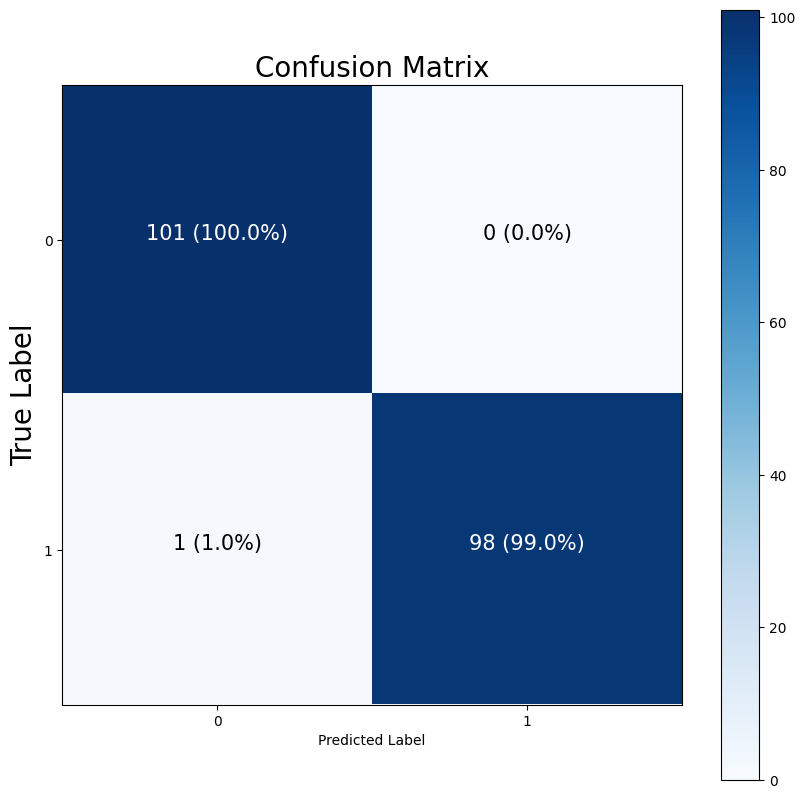

In [66]:
import itertools
figsize =(10,10)

# create the confusion matrix

cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]


fig,ax = plt.subplots(figsize=figsize)
#create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes=False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set the X-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label sizes
ax.yaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
# set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]> threshold else "black",
           size=15)

# Working with a larger exapmle
When you have more than 2 classes as an option, it's known as  **multi-class classification **

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes its multi-class classification

To practice multiclass classification , we're going to build a neural network to classify images of different items of clothing.


In [68]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and testing datasets
(train_data , train_labels) , (test_data , test_labels ) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [69]:
# Show the first training example
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [70]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

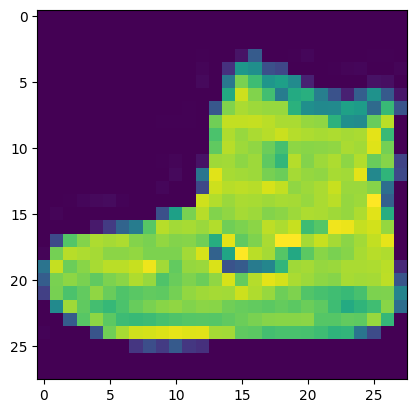

In [71]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [73]:
# Check out sample labels
train_labels[1]

0

In [74]:
# Create a small list so we can index on to our training labels
class_names =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

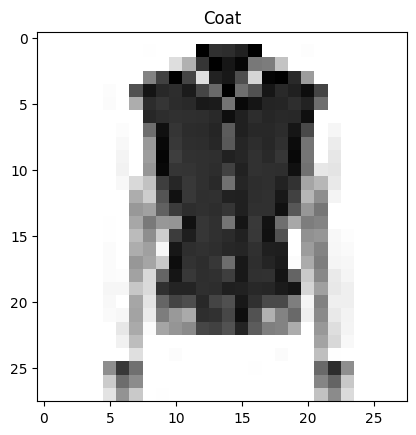

In [77]:
# Plot an example image and its label
index_of_choice = 76
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

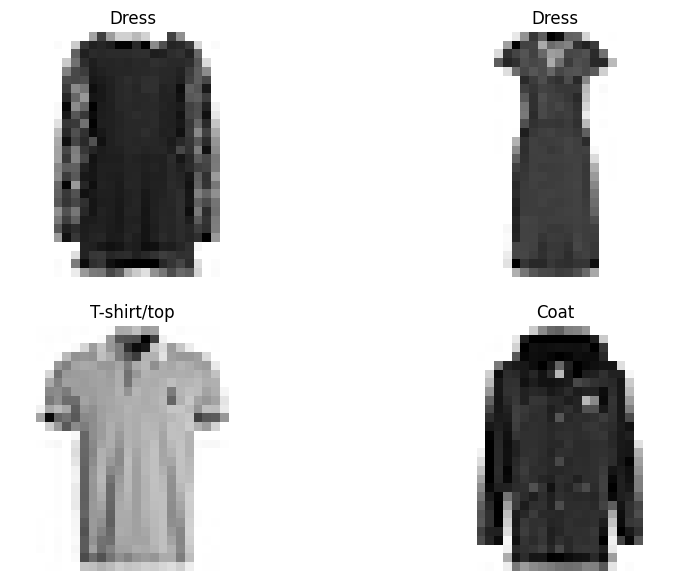

In [92]:
# Plot Multiple images of fashion MNIST

import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model
For oue multi-class classification model, we can use a similar architecture to our binary classifiers, however , we're going to have to tweak few things:
* Input Shape = 28*28(the shape of one image )
* Output Shape = 10 (one per class of the clothing)
* Loss fuction = tf.keras.losses.CategoricalCrossentropy()
* If your labels are one hot encoded use CategoricalCrossentropy()..
* If your labels are in integer forms use SaprseCategoricalentropy()
* Output layer activation = softmax not sigmoid

In [94]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [99]:
tf.one_hot(train_labels[:10],depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [100]:
# Set random Seed
tf.random.set_seed(42)
# creating the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])
# Compiling the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])
# Fit the model
non_norm_history = model_11.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data =(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.3325 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [102]:
# Set random seed
tf.random.set_seed(42)
# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.sigmoid)
])
# Compiling the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
# Fit the model
model_12.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3216 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3034 - accuracy: 0.0969 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy:

In [103]:
# Check the model summary
model_11.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Netwroks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1

In [105]:
# We can get our training and testing data b/w 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [108]:
# Now our data is normalized lets build a model to find the patterns in it
# Set the random seed
tf.random.set_seed(42)
# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])
# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
# Fit the model
norm_history = model_13.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0046 - accuracy: 0.1967 - val_loss: 1.9191 - val_accuracy: 0.1982
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6198 - accuracy: 0.3513 - val_loss: 1.1153 - val_accuracy: 0.5224
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9148 - accuracy: 0.6378 - val_loss: 0.8572 - val_accuracy: 0.6616
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7997 - accuracy: 0.6923 - val_loss: 0.8010 - val_accuracy: 0.6940
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7500 - accuracy: 0.7212 - val_loss: 0.7656 - val_accuracy: 0.7268
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7199 - accuracy: 0.7376 - val_loss: 0.7494 - val_accuracy: 0.7242
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7009 - accuracy: 0.7466 - val_loss: 0.7320 - val_accuracy:

**Note**- Neural Networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

<Axes: title={'center': 'normalized data'}>

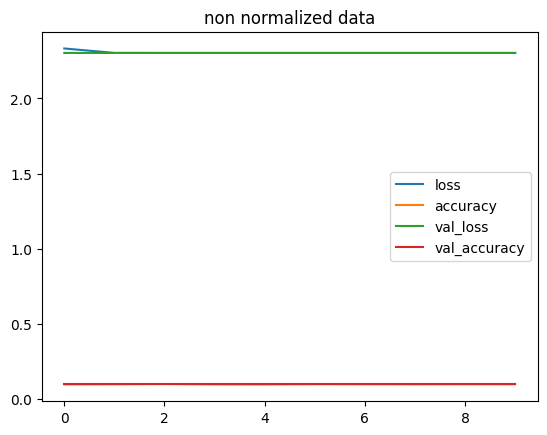

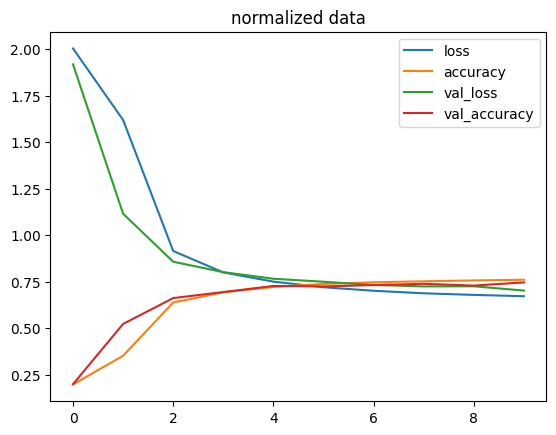

In [110]:
import pandas as pd
# Plot non-normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title='non normalized data')
# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title='normalized data')

> **Note** The same model with even *slightly* different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same achitecture but different data or same data but architecture)

## Finding the ideal leanring rate

In [112]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
# Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
# Fit the model
find_lr_history = model_14.fit(train_data_norm,train_labels,epochs = 40, validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1929 - accuracy: 0.5552 - val_loss: 0.8264 - val_accuracy: 0.6946 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7337 - accuracy: 0.7311 - val_loss: 0.7223 - val_accuracy: 0.7255 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6735 - accuracy: 0.7526 - val_loss: 0.6831 - val_accuracy: 0.7427 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6493 - accuracy: 0.7628 - val_loss: 0.6570 - val_accuracy: 0.7619 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6386 - accuracy: 0.7666 - val_loss: 0.6514 - val_accuracy: 0.7653 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6288 - accuracy: 0.7703 - val_loss: 0.6868 - val_accuracy: 0.7498 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate ')

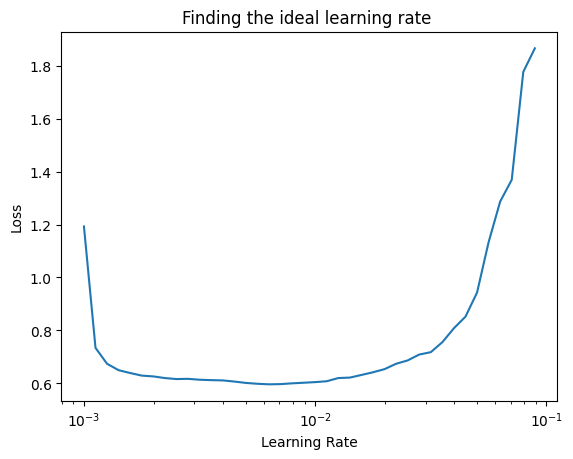

In [113]:
# Plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate ")

In [115]:
# Lets refit the model with the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])
# Fit the model
history_15 = model_15.fit(test_data_norm,
                          test_labels,
                          epochs = 40,
                          validation_data=(train_data_norm,train_labels))

Epoch 1/40
313/313 [==============================] - 6s 12ms/step - loss: 2.0944 - accuracy: 0.1922 - val_loss: 1.9289 - val_accuracy: 0.2750
Epoch 2/40
313/313 [==============================] - 3s 10ms/step - loss: 1.7667 - accuracy: 0.2943 - val_loss: 1.6545 - val_accuracy: 0.3180
Epoch 3/40
313/313 [==============================] - 3s 10ms/step - loss: 1.5708 - accuracy: 0.3494 - val_loss: 1.5059 - val_accuracy: 0.3914
Epoch 4/40
313/313 [==============================] - 3s 11ms/step - loss: 1.4354 - accuracy: 0.4345 - val_loss: 1.3527 - val_accuracy: 0.4812
Epoch 5/40
313/313 [==============================] - 3s 10ms/step - loss: 1.2937 - accuracy: 0.4955 - val_loss: 1.2710 - val_accuracy: 0.5079
Epoch 6/40
313/313 [==============================] - 3s 10ms/step - loss: 1.2216 - accuracy: 0.5233 - val_loss: 1.2000 - val_accuracy: 0.5341
Epoch 7/40
313/313 [==============================] - 6s 18ms/step - loss: 1.1676 - accuracy: 0.5512 - val_loss: 1.1485 - val_accuracy: 0.5700

## Evaluating our multi class classification model

To evaluate our multiclass classification model we could:

* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application


In [116]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
figsize =(10,10)


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  # create the confusion matrix
  cm=confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]


  fig,ax = plt.subplots(figsize=figsize)
  #create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set the X-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label sizes
  ax.yaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  # set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]> threshold else "black",
            size=(text_size))

In [118]:
# Make some predictions with our models
y_probs = model_15.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.9426045e-11, 0.0000000e+00, 1.1922661e-20, 0.0000000e+00,
        0.0000000e+00, 2.7484736e-01, 1.2998435e-19, 5.8796793e-02,
        3.3162289e-06, 6.6635251e-01],
       [1.3403193e-04, 1.4256777e-18, 9.4677758e-01, 1.5906728e-08,
        1.0830294e-03, 1.3410288e-06, 5.2004032e-02, 2.0309108e-16,
        1.9987172e-14, 2.2093888e-10],
       [2.4992311e-03, 9.2484492e-01, 7.5495697e-04, 4.1561253e-02,
        2.3971749e-03, 9.2117593e-04, 4.2960909e-03, 1.9180564e-04,
        2.2519691e-02, 1.3732466e-05],
       [2.4992311e-03, 9.2484492e-01, 7.5495697e-04, 4.1561253e-02,
        2.3971749e-03, 9.2117593e-04, 4.2960909e-03, 1.9180564e-04,
        2.2519691e-02, 1.3732466e-05],
       [1.8891218e-01, 1.5236100e-08, 2.0204403e-01, 9.3855150e-03,
        8.3122384e-03, 1.2232190e-03, 5.9008461e-01, 1.4622911e-07,
        3.4242137e-05, 3.9084102e-06]], dtype=float32)

In [121]:
y_probs[0],tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.9426045e-11, 0.0000000e+00, 1.1922661e-20, 0.0000000e+00,
        0.0000000e+00, 2.7484736e-01, 1.2998435e-19, 5.8796793e-02,
        3.3162289e-06, 6.6635251e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [122]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[766,   3,   4, 116,   4,   2,  82,   0,  23,   0],
       [  0, 950,   0,  41,   7,   0,   1,   0,   1,   0],
       [ 17,   6, 554,  14, 243,   0, 164,   0,   2,   0],
       [ 26,  20,   1, 880,  20,   0,  44,   0,   9,   0],
       [  0,  16,  75,  53, 794,   0,  62,   0,   0,   0],
       [  0,   0,   0,   0,   0, 887,   3,  42,   6,  62],
       [173,   5, 212,  89, 150,   0, 341,   0,  30,   0],
       [  0,   0,   0,   0,   0,  46,   0, 890,   5,  59],
       [ 15,   4,   1,   8,   2,   4,   9,   5, 952,   0],
       [  0,   0,   0,   0,   0,  36,   0,  34,   0, 930]])

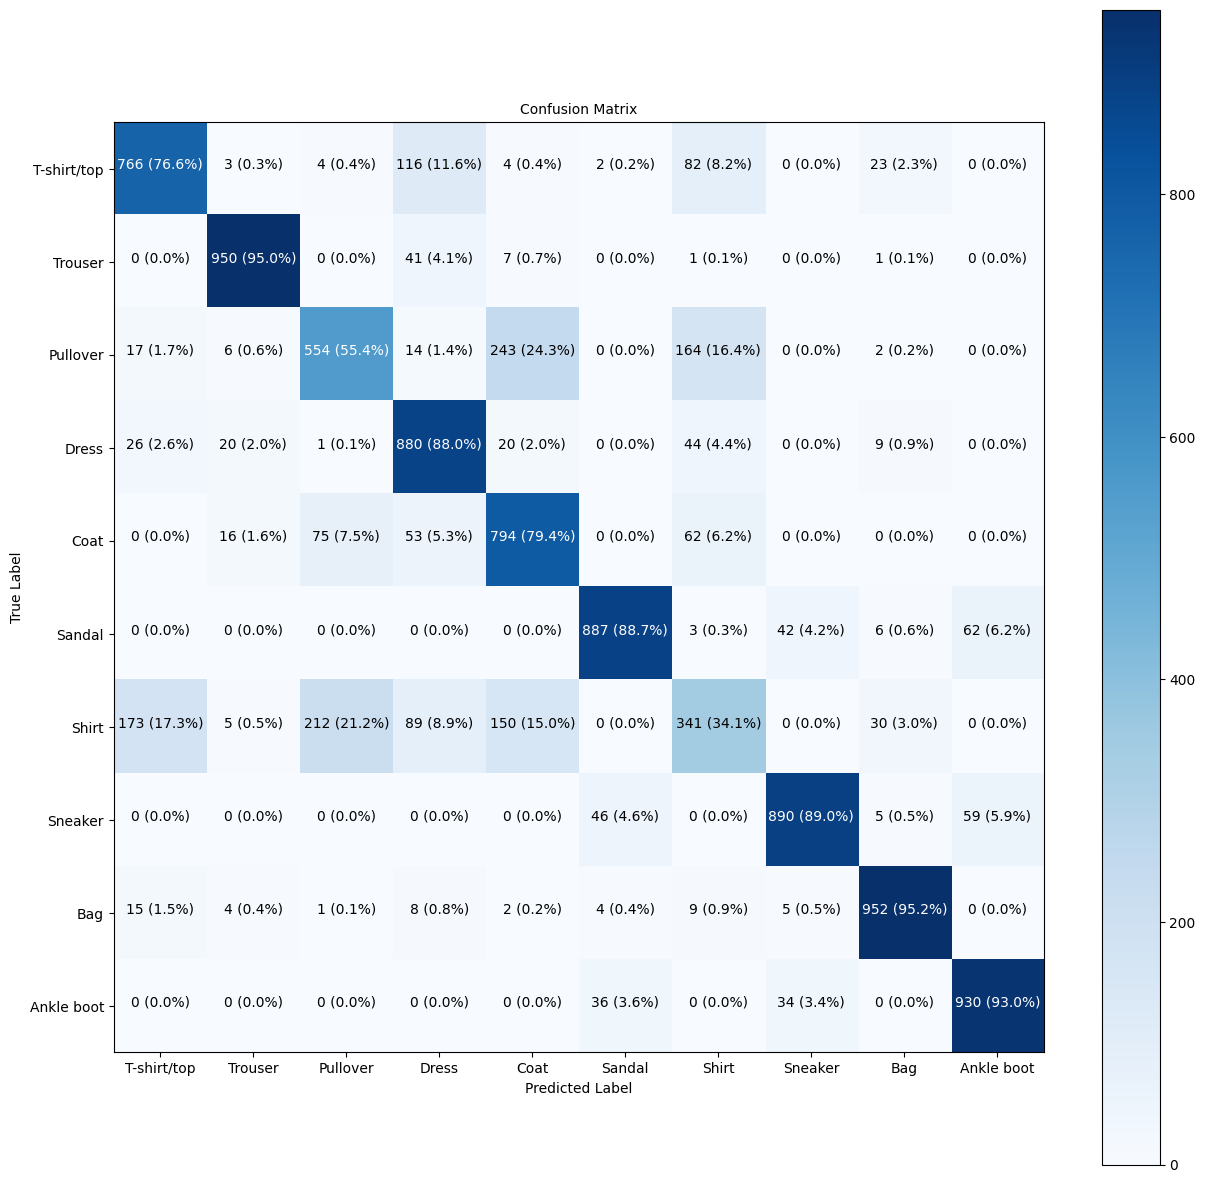

In [124]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [128]:
import random

def plot_random_image(model,images,true_labels,classes):
  i = random.randint(0,len(images))
  # create predictions and targets
  target_image=images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)
  # Chang ethe color of the titles depending on the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (predictions/truelabel)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 21ms/step


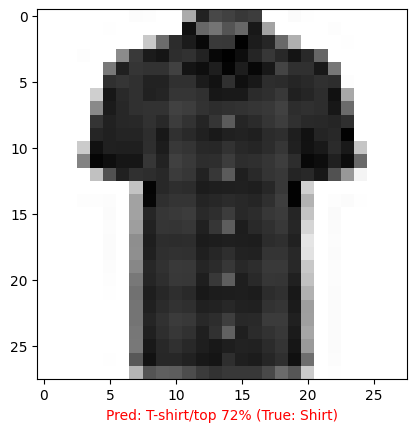

In [148]:
# Check out a random imahe
plot_random_image(model=model_15,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes = class_names)

### What patterns our model is learing

In [150]:
# Find the layers of our most recent models
model_15.layers

In [151]:
model_15.layers[1]

In [152]:
# Get the patterns of a layer in our network
weights , biases = model_15.layers[1].get_weights()
# Shapes
weights,weights.shape

(array([[ 0.16649787, -0.50162166, -0.00764157,  0.5862911 ],
        [ 1.0457298 ,  0.17259604,  0.5526388 , -0.8560438 ],
        [ 0.28218445, -0.37198228, -0.13592966,  0.38319954],
        ...,
        [-0.07870987, -0.43918714,  0.09075215,  0.36734748],
        [-0.09383166, -0.15807772, -0.24266595,  0.23870264],
        [-0.5734001 , -1.0784314 ,  0.15962762,  1.0268711 ]],
       dtype=float32),
 (784, 4))

# Lets check out bias vector

In [154]:
biases,biases.shape

(array([ 0.8192924 , -0.6877543 ,  1.6431575 ,  0.85663635], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.
The bias vector get initialized as zeros(at least in the case of a TensorFlow Dense Layer).
The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [155]:
model_15.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 4)                 3140      
                                                                 
 dense_61 (Dense)            (None, 4)                 20        
                                                                 
 dense_62 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


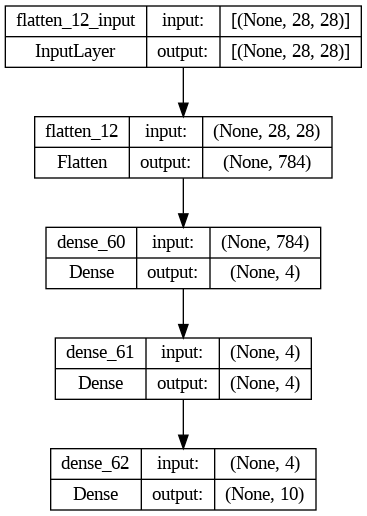

In [156]:
# Let's check out another way of viweing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_15,show_shapes=True)